In [10]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Wine dataset

We have a dataset `winequality.csv` about wine characteristics and we aim to predict the quality of Wine.

We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. 

Based on these features we will predict the quality of the wine.

Since the output variable is continuous, this is a **regression problem**.

Your task is:
1. loading the dataset `winequality.csv` using pandas
2. counting the number of rows and the number of columns
3. splitting the dataset in inputs (denoted as X, that includes the columns 0-11) and output (denoted as y,  column 11) and transform it into a numpy array using `.values.`
4. plot the scatterplot of the data for each Input, this is the command

`col=0
plt.scatter(X[:,col],y)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14) `
5. randomly splitting the rows in (X,y) in training (60% of the rows) and testing (40% of the rows), you can use the function `train_test_split` from `sklearn`
6. training a `LinearRegression` model on the training dataset and predict the output variable for the testing dataset

`linreg = LinearRegression(fit_intercept=True)  
linreg.fit(x_train, y_train) #training the algorithm
y_pred_tr = linreg.predict(x_train)
y_pred_te = linreg.predict(x_test)`
8. computing the mean squared error (MSE) of the prediction error for the train and test set

`np.mean((y_pred_tr-y_train)**2)
np.mean((y_pred_te-y_test)**2)`

and root mean squared error (RMSE)


`np.sqrt(np.mean((y_pred_tr-y_train)**2))
np.sqrt(np.mean((y_pred_te-y_test)**2))`

RMSE gives the error in the same scale of `y`, 



In [11]:
df = pd.read_csv('winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
df.shape

(1599, 12)

In [13]:
X = df.iloc[:, 0:11].values

In [14]:
y = df.iloc[:, -1].values

Text(0, 0.5, 'y')

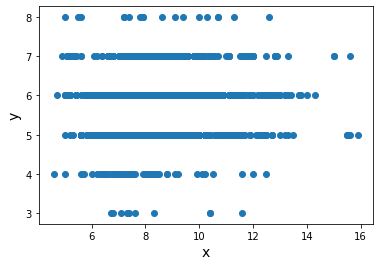

In [15]:
col=0
plt.scatter(X[:,col],y)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
linreg = LinearRegression(fit_intercept=True)
linreg.fit(x_train, y_train)
y_pred_tr = linreg.predict(x_train)
y_pred_te = linreg.predict(x_test)

In [20]:
np.mean((y_pred_tr-y_train)**2)

0.4141790128786947

In [21]:
np.mean((y_pred_te-y_test)**2)

0.42982536460267246

ValueError: x and y must be the same size

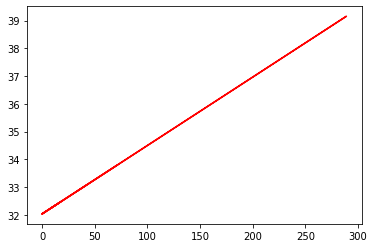

In [23]:
alpha = linreg.intercept_
beta = linreg.coef_[0]
plt.plot(X,alpha+beta*X,color='r')
plt.scatter(X,y)